# Projeto de predição - UNIVESP

Disciplina - Introdução a ciência de dados
Aluno - Thiago W P Sousa
Prof - Dr. Jośe Eduardo Santarem Segundo

## Objetivo

O objetivo desse projeto é demonstrar um projeto completo de predição, baseado no conjunto de dados "california_housing_train.csv" disponível no Google Colab.  
Vamos demonstrar as diferenças entre algoritmos:  
    1. KNN,  
    2. Árvores de Decisão,  
    3. RandomForest.  


## Importar as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importar o conjunto de dados

In [3]:
dados = pd.read_csv('./sample_data/california_housing_train.csv')
dados.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


### Entendendo os dados

O primeiro passo é entender o conjunto de dados. Essa etapa é crucial e é feita observando os dados e lendo o manual dos dados. Do conjunto carregado temos:  
* Id - Identificação única de cada local,
* latitude, longitude - Latitude e longitude do local,
* median_age - Mediana das idade das casas no loca,
* total_rooms - Quantidade total de cômodos na região,
* total_bedrooms - Quantidade total de quartos na região,
* population - População total na região,
* households - Número total de casas na região,
* median_income - Mediana da rendas das pessoas na região (dezena de milhares por ano),
* median_house_value - Mediana dos valores das casas na região **atributo alvo**

In [4]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Ainda na etapa de entender os dados, podemos instalar e usar a biblioteca **sweetviz** para ter mais informações sobre o conjunto de dados. Essa biblioteca gera um arquivo .html com as informações que queremos ver:

In [5]:
!pip install sweetviz
import sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 34.1 MB/s eta 0:00:00


In [7]:
analise_preliminar = sweetviz.analyze(dados)
analise_preliminar.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Mapa de calor (correlação das variáveis)

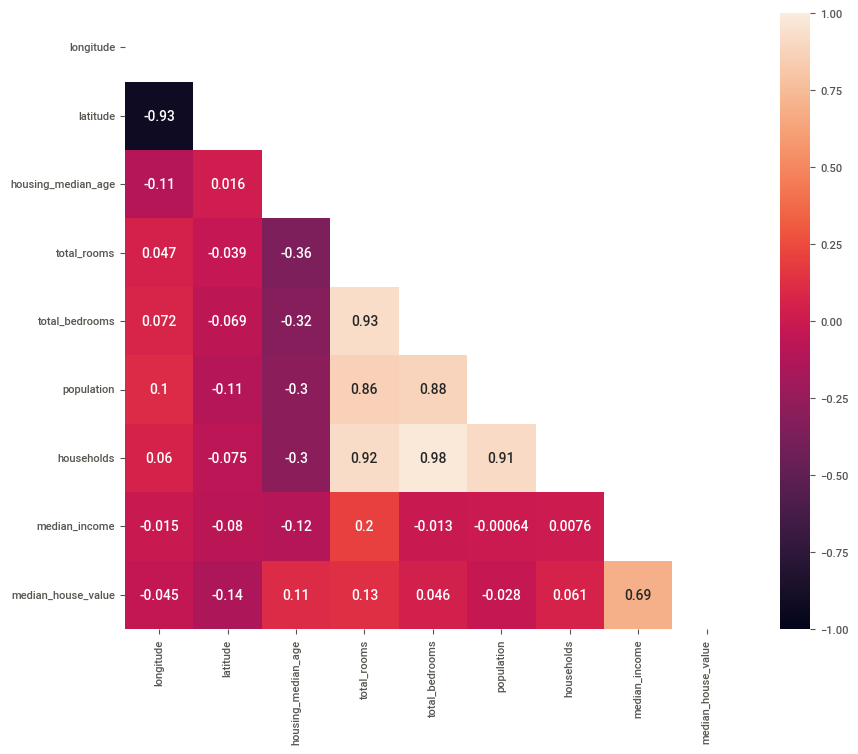

In [10]:
mask = np.triu(np.ones_like(dados.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(dados.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

## Iniciando o processo de Machine Learning

Como esse dataset é pré-pronto, não há muito o que pré-processar dos dados.  
Então, vamos inicialmente determinar o atributo alvo, o preço médio das casas

In [11]:
y = dados['median_house_value']

Após, vamos escolher as features (variáveis a serem utilizadas do seu conjunto de dados)

In [20]:
features=['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [21]:
X = dados[features]

In [22]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


Repare que nos passos acima, o que fizemos foi separar o valor das casas do conjunto de dados, uma vez que assumem papéis diferentes nesse projeto.

## Construindo o modelo

### Usar Scikit-Learn

* **Define**: Escola de modelo (define parâmetros),
* **Fit**: Treinar,  
* **Predict**: Fazer a predição,
* **Evaluate**: Avaliar os resultados.


In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
modelo = KNeighborsRegressor(3)

Agora que definimos o modelo, precisamos treiná-lo

In [25]:
modelo.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [26]:
dados.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [27]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


## Fazendo a predição

In [28]:
modelo.predict(X.head(5))

array([121966.66666667, 176900.        , 148066.66666667, 106700.        ,
       134300.        ])

Repare no seguinte:

Já temos os valores corretos. Então podemos comparar os valores preditos com os valores corretos. Quando olhamos essa predição podemos ver que o modelo está com dificuldade, pois previu valores errados (a julgar as duas primeiras linhas, errou pelo dobro).

O próximo passo é validor esse modelo.

### Validando o modelo

Erro = Atual - Previsão (achar a diferença)

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
predicao = modelo.predict(X)

In [31]:
predicao

array([121966.66666667, 176900.        , 148066.66666667, ...,
       106666.66666667, 128833.33333333, 252233.66666667])

In [32]:
mean_absolute_error(y,predicao)

55582.95749019608

### Vamos ver isso em um Dataframe (valor esperado x predição)

In [34]:
dados2 = pd.DataFrame(y)
dados2['predicao'] = predicao
dados2.sample(10)

,median_house_value,predicao
9651,106900.0,85300.000000
704,228600.0,276866.666667
3209,232400.0,158533.333333
13461,264600.0,225366.666667
3003,500001.0,500001.000000
4157,382500.0,265666.666667
12130,97000.0,285000.000000
1881,135700.0,103933.333333
10618,138000.0,96566.666667
14120,258300.0,200266.666667


In [35]:
dados2.describe()

,median_house_value,predicao
count,17000.000000,17000.000000
mean,207300.912353,207369.360078
std,115983.764387,88609.781215
min,14999.000000,38166.333333
25%,119400.000000,143533.333333
50%,180400.000000,186300.000000
75%,265000.000000,253575.250000
max,500001.000000,500001.000000


### Validação (outra forma)

In [36]:
from sklearn.model_selection import train_test_split

Agora, vamos dividir parte dos dados em treino e teste (80/20)

In [37]:
treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=1, train_size=0.8)

In [38]:
treino_X.shape

(13600, 8)

In [39]:
modelo2 = KNeighborsRegressor(3)

In [40]:
modelo2.fit(treino_X,treino_y)

KNeighborsRegressor(n_neighbors=3)

In [41]:
predicao2 = modelo2.predict(val_X)

### Vamos analisar o erro

In [43]:
mean_absolute_error(val_y, predicao2)

81475.73088235295

Repare, que o resultado piorou. Por que?

Porque antes, tinhamos treinado e validado o conjunto inteiro, mesmo com as respostas. Agora treinamos uma parte dos dados e testamos outra parte.

## Testando outros algoritmos - Árvore de decisão

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
modelotree=DecisionTreeRegressor(random_state=1, min_samples_leaf=15)

Repare que decidimos usar 15 folhas. A quantidade de folhas impacta no processamento, no resultado. O processo de ML consiste em ir variando esse número para poder ir avaliando os resultados.

In [46]:
modelotree.fit(X,y)

DecisionTreeRegressor(min_samples_leaf=15, random_state=1)

In [47]:
predicaotree = modelotree.predict(X)

In [48]:
mean_absolute_error(y,predicaotree)

30824.120657959214

Repare que assim como no KNN, treinamos e testamos no conjunto inteiro, o que não é correto. Agora vamos separar em treino e teste.

In [49]:
modelotree.fit(treino_X, treino_y)

DecisionTreeRegressor(min_samples_leaf=15, random_state=1)

In [50]:
predicao = modelotree.predict(val_X)

In [51]:
mean_absolute_error(val_y, predicao)

39663.62098113428

Podemos ver, desse resultado, que esse algoritmo performou melhor do que o KNN. Mas vamos para outro algoritmo, o Random Forest.

### Testando outros algoritmos - Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
modelorf = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=200)

In [55]:
modelorf.fit(treino_X, treino_y)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=1)

In [56]:
predicao=modelorf.predict(val_X)

In [57]:
mean_absolute_error(val_y, predicao)

31134.331648529413

Agora, vamos outro teste. E se aumentarmos o número de estimadores de 200 para 600? Como isso impactaria nosso resultado?

In [58]:
modelorf2 = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=600)

In [59]:
modelorf2.fit(treino_X, treino_y)

RandomForestRegressor(n_estimators=600, n_jobs=-1, random_state=1)

In [62]:
predicao2=modelorf2.predict(val_X)

In [63]:
mean_absolute_error(val_y, predicao2)

31062.15870392157

Repare que houve uma melhora, ainda que pequena. isso reflete que, no processo de ML todos os parâmetros são importantes. Apesar dessa melhora pequena, poderíamos ter variado os demais parâmetros, como por exemplo o tamanho do conjunto de teste/treino.

Por fim, vejamos a comparação final:

| Algoritmo | Erro médio absoluto |
|-----------|---------------------|
|KNN, k=3| 81475.73|
|Árvore de Decisão, n_leafs=15|39663.62 |
|Random Forest, n_estimators=200|31134.33 |
|Random Forest, n_estimators=600|31062.16 |